In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow import keras 
# from keras.preprocessing import image 
# from image import ImageDataGenerator


In [2]:
batch_size=16
training_datagenerator= ImageDataGenerator(rescale=1./255, horizontal_flip=True, 
                                          vertical_flip=True, shear_range=0.2, 
                                          zoom_range=0.2, width_shift_range=0.2, 
                                          height_shift_range=0.2, validation_split=0.1)

In [ ]:
train=training_datagenerator.flow_from_directory('enter location of trianing data for training', 
                                                target_size=(256, 256), 
                                                color_mode='rgb', 
                                                class_mode='binary', batch_size=16, subset='training')

validation=training_datagenerator.flow_from_directory('enter location of training data for validation', 
                                                target_size=(256, 256), 
                                                color_mode='rgb', 
                                                class_mode='binary', batch_size=16, subset='validation')

Found 12361 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


In [4]:
#initializing CNN
cnn=tf.keras.models.Sequential()

#first layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#second layer 
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#third layer 
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#flattening 
cnn.add(tf.keras.layers.Flatten())

#fully connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#Output Layers
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

In [ ]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('enter location for checkpoint of model and saving it /DL_Model.h5', 
                                             monitor='val_loss', mode="min", 
                                            save_best_only=True)
callbacks=checkpoint

In [8]:
cnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit_generator(train, validation_data=validation,epochs=1,  
                  steps_per_epoch=train.samples//batch_size, 
                  validation_steps=validation.samples//batch_size, 
                  callbacks=callbacks)

#steps_per_epochs=train.samples//batch_size,

C:\Users\Swayam\AppData\Local\Temp\ipykernel_2636\1705502131.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train, validation_data=validation,epochs=1,


772/772 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.9800

C:\Users\Swayam\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


772/772 [==============================] - 1411s 2s/step - loss: 0.0785 - accuracy: 0.9800 - val_loss: 0.0085 - val_accuracy: 0.9978


In [ ]:
#from tensorflow.keras.models import load_model
from keras import models
from keras.models import load_model

cnn=load_model(r'load previously saved model\DL_Model.h5')

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
import PIL
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 134ms/step
fire detected


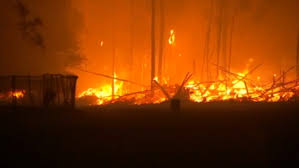

In [ ]:
image_testing=r'load images to check '

test_image=image.load_img(image_testing, target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)

result=cnn.predict(test_image)
result

#result=cnn.predict_classes(test_image)

if result>=0 and result <1:
    print("fire detected");
else:
    print("No fire detected")

    
PIL.Image.open(image_testing)

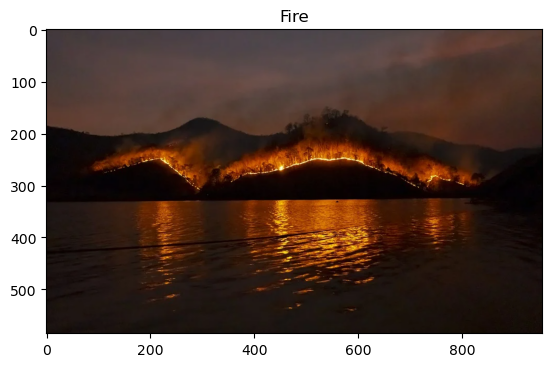

In [13]:
categories=['Fire', 'No Fire']

image_show=PIL.Image.open(image_testing)
plt.imshow(image_show)

plt.title(categories[int(result[0][0])])
plt.show()
